<a href="https://colab.research.google.com/github/Shubham-Niture/S-ML-Assignments/blob/main/Shubham_Niture_Group_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group A : Heart Disease prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# Problem Statement:
# Predict whether a patient has heart disease based on given features.

# Objectives:
# 1. Preprocess and explore the dataset.
# 2. Train and evaluate classification models (Logistic Regression, Random Forest).
# 3. Implement and compare a Neural Network with traditional classifiers.


In [ ]:


# Load the dataset
dataset_path = "/content/drive/MyDrive/Exam_DA1/heart.csv"  # Replace with the actual path to your dataset
data = pd.read_csv(dataset_path)

In [ ]:
# Explore the dataset
print("First 5 rows of the dataset:")
print(data.head())  # Display first 5 rows

First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0     150      0      2.3      0   
1   37    1   2       130   250    0        1     187      0      3.5      0   
2   41    0   1       130   204    0        0     172      0      1.4      2   
3   56    1   1       120   236    0        1     178      0      0.8      2   
4   57    0   0       120   354    0        1     163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [ ]:
# Identify features with missing values
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach     15
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64


In [ ]:
# Handle missing values
# Using mean imputation for simplicity
# Convert non-numeric values in 'thalach' to NaN
data['thalach'] = pd.to_numeric(data['thalach'], errors='coerce')

# Handle missing values for 'thalach' using the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
data['thalach'] = imputer.fit_transform(data[['thalach']])

print("\nMissing values in 'thalach' handled.")



Missing values in 'thalach' handled.


In [ ]:
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Check for data types and outliers
print("\nData types:")
print(data.dtypes)


Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
print("\nSummary statistics:")
print(data.describe())



Summary statistics:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  150.036304    0.326733    1.039604    1.399340    0.729373   
std   

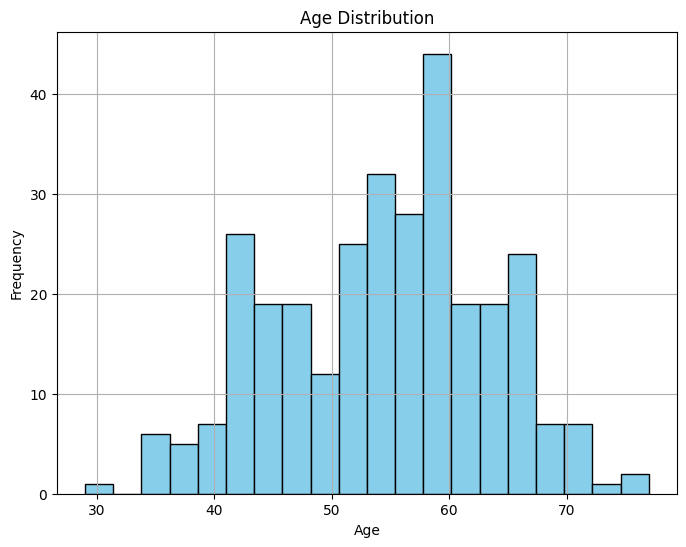

In [ ]:
# Age Distribution
plt.figure(figsize=(8, 6))
data['age'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


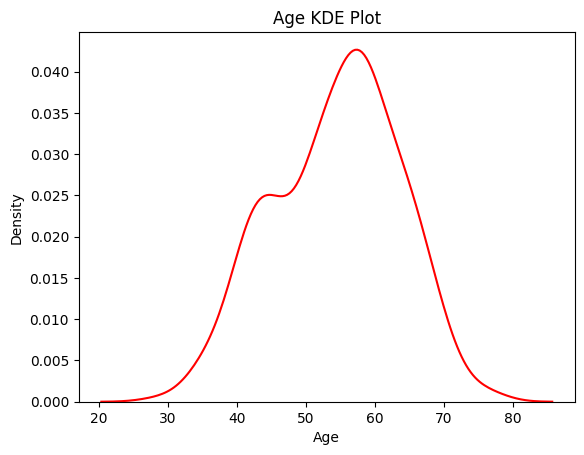

In [ ]:
# Check if age follows a normal distribution
sns.kdeplot(data['age'], color='red')
plt.title('Age KDE Plot')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [ ]:
# Data Preparation
# Normalize numeric features

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']  # Including all numeric columns
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [ ]:
print(data.head())

        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333    1   3  0.481132  0.244292    1        0  0.603053      0   
1  0.166667    1   2  0.339623  0.283105    0        1  0.885496      0   
2  0.250000    0   1  0.339623  0.178082    0        0  0.770992      0   
3  0.562500    1   1  0.245283  0.251142    0        1  0.816794      0   
4  0.583333    0   0  0.245283  0.520548    0        1  0.702290      1   

    oldpeak  slope   ca  thal  target  
0  0.370968      0  0.0     1       1  
1  0.564516      0  0.0     2       1  
2  0.225806      2  0.0     2       1  
3  0.129032      2  0.0     2       1  
4  0.096774      2  0.0     2       1  


In [ ]:
# Encode categorical variables
categorical_features = ['cp', 'thal']  # Example categorical columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_features]),
                            columns=encoder.get_feature_names_out(categorical_features))
data = pd.concat([data.drop(columns=categorical_features), encoded_data], axis=1)


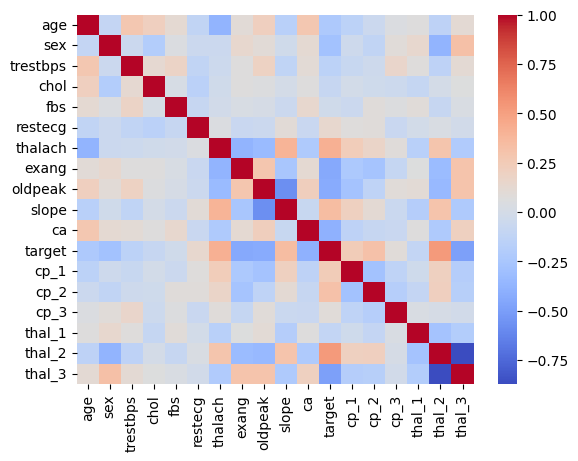

In [ ]:
# Feature Selection
# Remove least significant features using correlation
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()


In [ ]:
# Removing two features based on low correlation or redundancy (example: 'fbs', 'restecg')
data = data.drop(columns=['fbs', 'restecg'])

In [ ]:
# Splitting dataset
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_lr = logistic_model.predict(X_test)

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluation Metrics
metrics = {'Logistic Regression': y_pred_lr, 'Random Forest': y_pred_rf}
for model_name, predictions in metrics.items():
    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Precision:", precision_score(y_test, predictions))
    print("Recall:", recall_score(y_test, predictions))
    print("F1-Score:", f1_score(y_test, predictions))


Logistic Regression Metrics:
Accuracy: 0.8688524590163934
Precision: 0.9285714285714286
Recall: 0.8125
F1-Score: 0.8666666666666667

Random Forest Metrics:
Accuracy: 0.819672131147541
Precision: 0.8620689655172413
Recall: 0.78125
F1-Score: 0.819672131147541


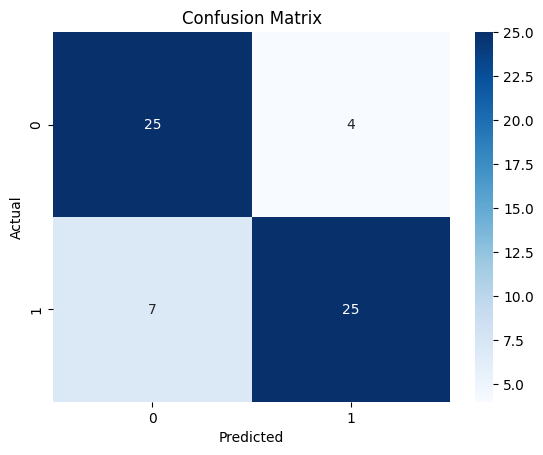

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4842 - loss: 0.7259 - val_accuracy: 0.4082 - val_loss: 0.6885
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4561 - loss: 0.7087 - val_accuracy: 0.5102 - val_loss: 0.6820
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4562 - loss: 0.6894 - val_accuracy: 0.5306 - val_loss: 0.6759
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5664 - loss: 0.6812 - val_accuracy: 0.5102 - val_loss: 0.6704
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4720 - loss: 0.6924 - val_accuracy: 0.5306 - val_loss: 0.6655
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5432 - loss: 0.6756 - val_accuracy: 0.5306 - val_loss: 0.6608
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5052 - loss: 0.6802 - val_accuracy: 0.5714 - val_loss: 0.6546
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5976 - loss: 0.6661 - val_accuracy: 0.7347 - val_loss: 0.6459
Epo

In [ ]:
# Evaluate Neural Network
nn_metrics = nn_model.evaluate(X_test, y_test)
print("\nNeural Network Metrics:")
print("Loss:", nn_metrics[0])
print("Accuracy:", nn_metrics[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8287 - loss: 0.4003 

Neural Network Metrics:
Loss: 0.3766741454601288
Accuracy: 0.8524590134620667


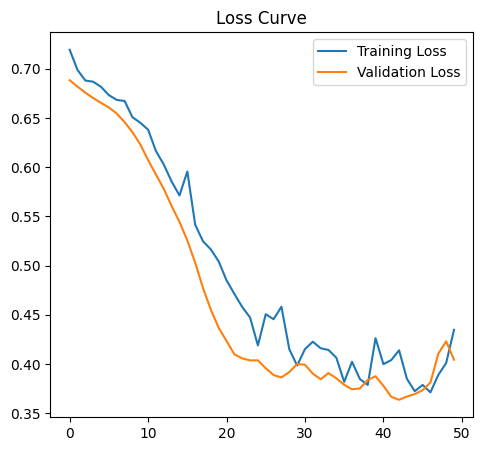

In [ ]:
# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.legend()


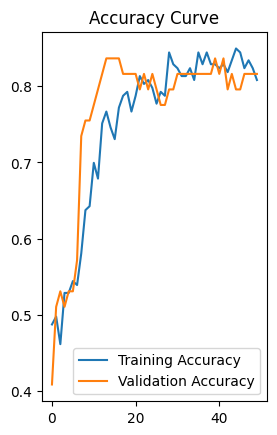

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.legend()

plt.show()

In [ ]:
# Real-World Applications
# These methods are suitable for healthcare scenarios where early detection of diseases is crucial.
# Logistic Regression and Random Forest offer interpretable results, while Neural Networks
# can model complex relationships. For example, this approach can assist in predicting cardiovascular risks based on patient data.
